In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math

In [26]:
class Problem:
    ### to solve a problem using Evolutionary Algorithms, me must define four methods
    
    def random_solution(self):
        # this method returns a random solution for a given problem
        # ...we need it to create the initial population!
        return []
    
    def evaluate(self, s):
        # this method returns the quality of a given solution s
        # ...we need it to decide which solutions should participate in creating the new population!
        return 0.0
    
    def mutate(self, s):
        # this method returns a slightly modified solution s
        # ...this is one of the evolutionary operators!
        return s[:]
    
    def crossover(self, s1, s2):
        # this method returns a solution that is a combination of its parent solutions - s1 and s2
        # ...this is one of the evolutionary operators!
        return s1[:]
    
    ### additionally, we should define a method that will give us a preview of any given solution s
    def display_solution_param(self, s):
        print(s)

In [50]:
class TSP(Problem):
    cities = 0
    distances = []
    locations = []
    
    def __init__(self, cities, city_coords=None, seed=random.randint(0, 2e9)):
        # we draw random locations for the cities and we prepare a matrix of distances between them - it will come useful later!
        
        random.seed(seed)
        self.cities = cities
        
        self.locations = []
        if city_coords is None:
            for i in range(cities):
                self.locations.append((random.random(), random.random()))
        else:
            for i in range(cities):
                self.locations.append(city_coords[i])
        
        self.distances = []
        for i in range(cities):
            self.distances.append([])
            for j in range(cities):
                self.distances[i].append(self.distance(i, j))
                
    def distance(self, c1, c2):
        # euclidean distance between two points on a map
        
        loc1, loc2 = self.locations[c1], self.locations[c2]
        return math.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
    
    def random_solution(self):
        # we return a random permutation of numbers, which corresponds to a random order of visiting cities
        
        s = [i for i in range(self.cities)]
        random.shuffle(s)
        return s
    
    def evaluate(self, s):
        # length of the route is equal to the sum of distances between all subsequent cities
        # notice that we include the distance between the first and the last city as well! the route is a loop!
        
        fit = 0
        for i in range(len(s)):
            fit += self.distances[s[i]][s[i+1 if i+1<len(s) else 0]]
        return fit
    
    def mutate(self, s):
        # to mutate a solution, we reverse a random subsequence of the solution
        # the route is a loop, so we need to handle the subsequences that cross the end of the array in a special way!

        sol = s[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c1 < c2:
            rev = sol[c1:c2+1]
            rev.reverse()
            sol[c1:c2+1] = rev
        else:
            rev = sol[c1:] + sol[:c2+1]
            rev.reverse()
            sol[:(c2+1)] = rev[-(c2+1):]
            sol[c1:] = rev[:-(c2+1)]
        return sol
    
    def crossover(self, s1, s2):
        # to combine two different routes, we use OX (order crossover)
        
        sol1, sol2 = s1[:], s2[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c2 < c1:
            ctmp = c1
            c1 = c2
            c2 = ctmp
        sol1[c1:c2+1] = list(filter(lambda x: x in sol1[c1:c2+1], s2))
        sol2[c1:c2+1] = list(filter(lambda x: x in sol2[c1:c2+1], s1))
        
        return sol1, sol2
    
    def display_solution(self, solution):
        fig, ax = plt.subplots(figsize=(8, 8))

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)
            
        plt.xlim((-0.03,1.03))
        plt.ylim((-0.03,1.03))
        plt.show()

In [51]:
class TSP_Poland(TSP):

    def dist(self, x1, y1, x2, y2):
        return ((x1-x2)**2+(y1-y2)**2)**(1/2)

    def __init__(self, seed=random.randint(0, 2e9)):
        city_names = ["Poznan", "Wroclaw", "Krakow", "Warszawa", "Gdansk", "Katowice", "Lodz",
                       "Bialystok", "Rzeszow", "Szczecin", "Lublin", "Olsztyn", "Kielce", "Gdynia", "Bydgoszcz", "Zakopane"]
        city_coords = {
            "Poznan": (52.409538, 16.931992),
            "Wroclaw": (51.107883, 17.038538),
            "Krakow": (50.049683, 19.944544),
            "Warszawa": (52.237049, 21.017532),
            "Gdansk": (54.372158, 18.638306),
            "Katowice": (50.270908, 19.039993),
            "Lodz": (51.759445, 19.457216),
            "Bialystok": (53.13333, 23.16433),
            "Rzeszow": (50.041187, 21.999121),
            "Szczecin": (53.42894, 14.55302),
            "Lublin": (51.25, 22.56667),
            "Olsztyn": (53.77995, 20.49416),
            "Kielce": (50.87033, 20.62752),
            "Gdynia": (54.51889, 18.53188),
            "Bydgoszcz": (53.1235, 18.00762),
            "Zakopane": (49.29899, 19.94885)
        }      
        super().__init__(len(city_names), [city_coords[city] for city in city_names], seed)
    
    ### DISPLAY (you don't have to read it) ###

    def force_aspect(self, ax, aspect=1):
        im = ax.get_images()
        extent =  im[0].get_extent()
        ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
        
        
    def display_solution(self, solution):
        self.display_solution_param(solution, True, [11.328361, 27.045778], [49.0025, 54.835778])
        
    def display_solution_param(self, solution, show_map, xlim, ylim):
        fig, ax = plt.subplots(figsize=(8, 8))
        
        if show_map:
            datafile = 'polska.png'
            img = mpimg.imread(datafile)
            plt.imshow(img, zorder=0, extent=[14.245, 24.129139, 49.0025, 54.835778])

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)

        if show_map:
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            self.force_aspect(ax)
            
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.show()

**Task 1:** Generate a random route for the TSP_Poland problem. Display the route and three possible mutations of that route. Repeat that for a new instance of the problem. Did the routes change? Why / why not?

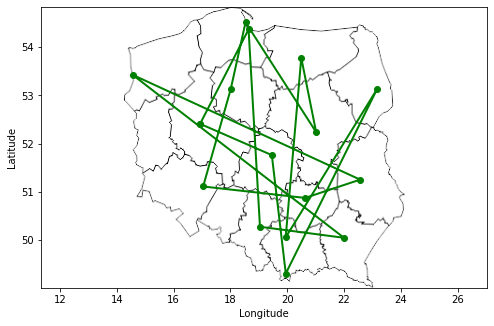

15 2


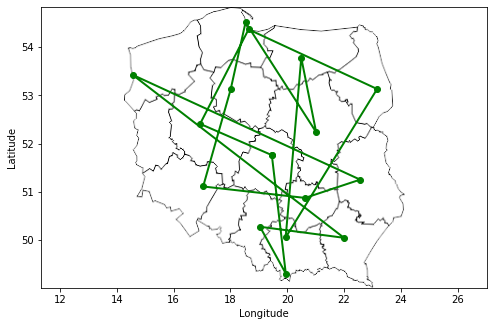

6 11


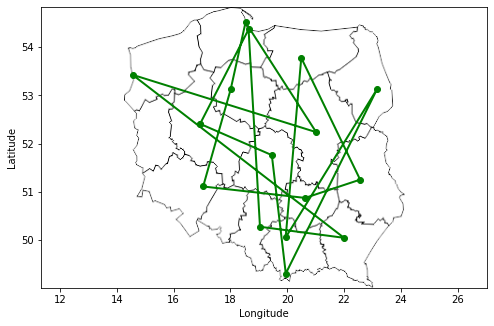

8 2


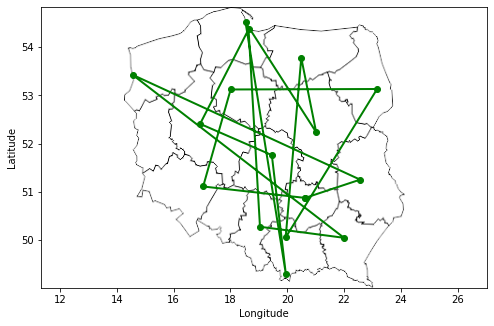

-----------------------------------------------------


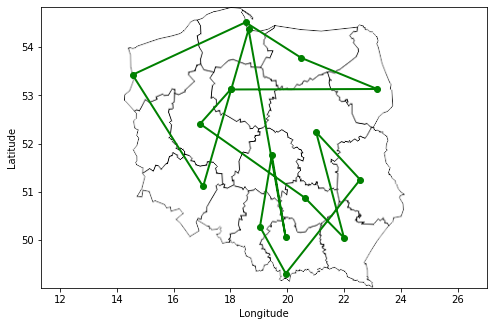

7 3


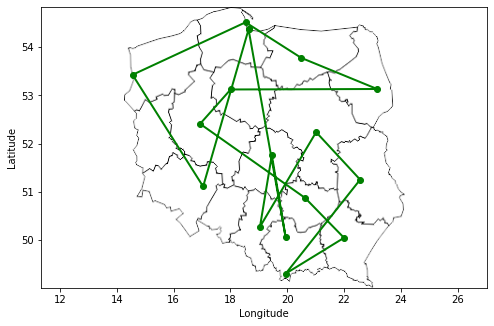

15 10


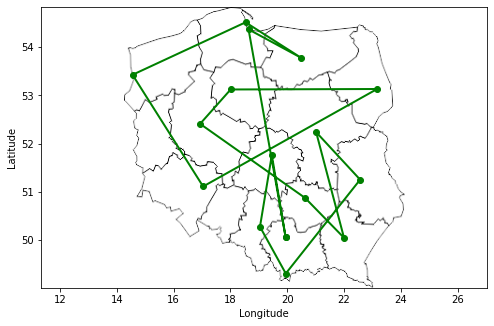

7 14


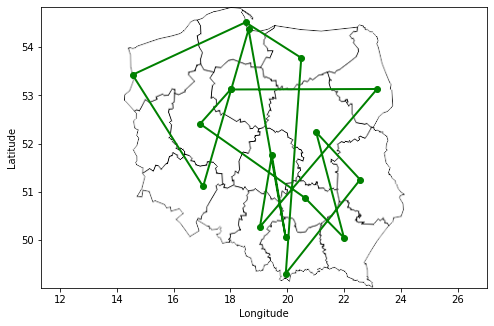

-----------------------------------------------------


In [52]:
for i in range(2):
    r = t.random_solution()
    t.display_solution(r)
    r2 = t.mutate(r)
    t.display_solution(r2)
    r3 = t.mutate(r)
    t.display_solution(r3)
    r4 = t.mutate(r)
    t.display_solution(r4)
    print("-----------------------------------------------------")

#ANSWER:
#When we generate new routes they are the same and in the same way they are mutate. 
#It is because of the seed which is based on t in t.random_solution().
#Solutions based on the same seed won't be different. 
#To change that we have to change the seed adding in our code seed=random.randint(0, 2e9)
#After that in each iteration, we will generate a different solotution, which additionaly will be mutate.

**Task 2:** Implement an algorithm searching for the best solution by generating random solutions. Write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluations over 10 runs.

In [53]:
t = TSP_Poland(seed=random.randint(0, 2e9))

def avgfit(t,n):
    sumFit=0
    for i in range(10):
        minFit=100
        for i in range(n):
            r = t.random_solution()
            fit=t.evaluate(r)
            if fit<minFit:
                minFit=fit
        sumFit+=minFit
    return(sumFit/10)
print(avgfit(t,10))
print(avgfit(t,100))
print(avgfit(t,1000))
print(avgfit(t,10000))


48.979947228764644
42.50985782888322
40.406457071948424
37.43340050946233


**Task 3:** Implement the generational evolutionary algorithm with tournament selection. Let it be parametrized with four parameters: the size of the population $N$, the size of the tournament $t$, the probability of mutation $p_m$ and the probability of crossover $p_c$. The algorithm should terminate automatically after 50 generations with no improvement.

* Assume $N=20$, $t=3$, $p_m=0.6$ and $p_c=0.2$. For the TSP_Poland problem, write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluations over 10 runs. Does the algorithm find better solutions than random search?
* What is the difference between random search and evolution?

In [75]:
import random

def getParentIndices(populationSize, K):
    parent1 = [0]
    paren2 = [0]
    s1=[]
    s2=[]
    for i in range(K):
        s1.append(random.randrange(0,populationSize))
        s2.append(random.randrange(0,populationSize))
    s1.sort()
    s2.sort()
    
    p1=s1[0]
    i=0
    while i<K-1 and s2[i]==p1:
        i+=1
    p2=s2[i]
    parents = [p1,p2]
    return parents
    
def getMatingPool(matingPoolSize, populationSize, K):
    matingPool = []
    for i in range(matingPoolSize):
        matingPool.append(getParentIndices(populationSize,K))
    return matingPool

def getOffspring(population, matingPool, pm, pc,T):
    children = []
    x=0
    for i in matingPool:
        if random.random() < pc:
            child1, child2 = T.crossover(population[i[0]][1], population[i[1]][1])
            children.append([T.evaluate(child1), child1])
            children.append([T.evaluate(child2), child2])
            x += 2
    for i in range(x):
        if random.random() < pm:
            child = t.mutate(children[i][1])
            children[i][0] = t.evaluate(child)
            children[i][1] = child
    return children

def generatiolnalEvolutionaryAlgorithmPart1(N,t,pm,pc):
    pop=[]
    T=TSP_Poland()

    for i in range(N):
        r=T.random_solution()
        fit=T.evaluate(r)
        tab=[fit,r]
        pop.append(tab)
        #print(pop[i])
    pop.sort()
    return pop,T

def generatiolnalEvolutionaryAlgorithmPart2(N,t,pm,pc,new_pop,n,T):
    sumFit=0
    for i in range(10):
        minFit=100
        for i in range(n):
            pop=new_pop
            matingPool=getMatingPool(N,N,t)
            #print(matingPool)
            children=getOffspring(pop,matingPool,pm,pc,T)
            for i in range(len(children)):
                pop.append(children[i])
            pop.sort()
            new_pop=[]
            for i in range(N):
                new_pop.append(pop[i])
            if new_pop[0][0]<minFit:
                minFit=new_pop[0][0]
        sumFit+=minFit
    return sumFit/10
        

    
pop,T=generatiolnalEvolutionaryAlgorithmPart1(20,3,0.6,0.2)
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,0.6,0.2,pop,10,T))
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,0.6,0.2,pop,100,T))
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,0.6,0.2,pop,1000,T))
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,0.6,0.2,pop,10000,T))

#Answer:
#Yes, algorithm performs better solutions. It is because in random serach the programm creates new population i every iteration.
#In evolutionary algorithm, programm creates one initial population which is constantly improved.
#In evolutionary algorithm each new population should be at least as good as the previous one.
#In random search algorithm we can't be sure that each of the populations will be better than the previous one, because it is random.


32.55814812052948
26.999556571544595
27.36158771275533
27.35073291676874


**Task 4:** Perform some experiments using different instance sizes for the TSP problem. How do the parameters of the algorithm influence the quality of the solutions found by the algorithm? How do they influence the total number of evaluations made before the algorithm halts? Are the optimal parameter values the same for small and big instances of the TSP problem? Why / why not?

In [82]:
print("Different size of population")
pop,T=generatiolnalEvolutionaryAlgorithmPart1(5,3,0.6,0.2)
print(generatiolnalEvolutionaryAlgorithmPart2(5,3,0.6,0.2,pop,10,T))
pop,T=generatiolnalEvolutionaryAlgorithmPart1(20,3,0.6,0.2)
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,0.6,0.2,pop,10,T))
pop,T=generatiolnalEvolutionaryAlgorithmPart1(50,3,0.6,0.2)
print(generatiolnalEvolutionaryAlgorithmPart2(50,3,0.6,0.2,pop,10,T))
print()
print("Different size of tournament")
pop,T=generatiolnalEvolutionaryAlgorithmPart1(20,1,0.6,0.2)
print(generatiolnalEvolutionaryAlgorithmPart2(20,1,0.6,0.2,pop,10,T))
pop,T=generatiolnalEvolutionaryAlgorithmPart1(20,3,0.6,0.2)
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,0.6,0.2,pop,10,T))
pop,T=generatiolnalEvolutionaryAlgorithmPart1(20,10,0.6,0.2)
print(generatiolnalEvolutionaryAlgorithmPart2(20,10,0.6,0.2,pop,10,T))
print()
print("Different probability of mutation")
pop,T=generatiolnalEvolutionaryAlgorithmPart1(20,3,0.1,0.2)
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,0.1,0.2,pop,10,T))
pop,T=generatiolnalEvolutionaryAlgorithmPart1(20,3,0.6,0.2)
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,0.6,0.2,pop,10,T))
pop,T=generatiolnalEvolutionaryAlgorithmPart1(20,3,1,0.2)
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,1,0.2,pop,10,T))
print()
print("Different probability of crossover")
pop,T=generatiolnalEvolutionaryAlgorithmPart1(20,3,0.6,0.1)
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,0.6,0.1,pop,10,T))
pop,T=generatiolnalEvolutionaryAlgorithmPart1(20,3,0.6,0.2)
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,0.6,0.2,pop,10,T))
pop,T=generatiolnalEvolutionaryAlgorithmPart1(20,3,0.6,1)
print(generatiolnalEvolutionaryAlgorithmPart2(20,3,0.6,1,pop,10,T))

#Answer:
#The quality of the solutions increases when each of the four parameters is increasing.
#The highest is the size of the population and the biggest is the size of tournament,
# the biggest group of solutions must compete with each other.


Different size of population
35.188925984258944
32.55814812052948
31.40778874859047

Different size of tournament
34.2578363806077
32.55814812052948
30.323457431012777

Different probability of mutation
31.17317174552297
32.55814812052948
29.795663808515133

Different probability of crossover
36.07833472060192
32.55814812052948
28.593875684111133


**Task 5:**

* What is the role of a mutation operator in evolutionary algorithms?
* What are the properties of a good mutation operator?
* What is the role of a crossover operator in evolutionary algorithms?
* What are the properties of a good crossover operator?
* What does it mean for the population to converge?
* How do the parameters of the evolutionary algorithm affect the speed of its convergence?
* Does the speed of the algorithm's convergence correlate with the quality of the solutions? What is the reason?
* Can a population escape from a local optimum once it has converged?

In [83]:
#Answer:

In [85]:
#Mutation operator causes, that children could have completey different parts than their parents.
#Thanks to this we can search the best solution in the biggest area, than that which covers all options of crossovers
#between two parent solutions.
#In other words we can search for the solutions in different local optima, hoping that one of this will be the global optimum.

In [86]:
#Good mutation operator has to produce the solution slightely different than the previous one, 
#the solution, that couldn't be created in crossing over of 2 parents,
#but also, the solution that won't be completely different than the version before mutation.
#If the mutation will be to strong, then we can as well use a random search.

In [87]:
#Crossover operator allow us to combine 2 good solutions with hope, that the child will be better than its parents.

In [88]:
#Good crossover operator should take a half of the first parent solution and a half of the second parent solution.
#It shouldn't crate invalid solutions.

In [89]:
#If population converges, then all the solutions becoming more and more similar to each other.

In [90]:
#The lack of mutations could cause, that the population will converge very fast.
#If the size of tournament will be to high it also makes the population convergent in a short time.

In [91]:
#Yes, the highest is the speed of convergence, the biggest chance that all the solutions will stuck in the one local optimum.
#It is crutial to find the balance between too slow convergence, when the solutions are jumping through the whole fitness landascape
# and too fast convergance, when they are focused in the one local optimum.

In [ ]:
#No, the algorithm will end after convergence, because it won't find any improvement.